#### Apprentissage par perceptron multi-couche

In [1]:
#Importing
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import time

#Database
mnist = fetch_openml('mnist_784')


In [2]:
#Echantillon
sample = np.random.randint(70000, size=7000)
data = mnist.data[sample]
target = mnist.target[sample]

#Split for train/test
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=4900)


#### Construire un modèle de classification ayant comme paramètre : hidden_layer_sizes = (50), puis calculez la précession du classifieur

In [3]:
#Model classificator
model = MLPClassifier(hidden_layer_sizes=50)
#Train
model.fit(xtrain, ytrain)

#Score & Error
score=model.score(xtest,ytest)*100
print("Score: "+str(score))
error=100-score
print("Error: "+str(error))


Score: 88.23809523809524
Error: 11.76190476190476


####  Afficher la classe de l’image 9 et sa classe prédite

In [4]:
#Test on the number 9
prediction=model.predict(mnist.data[22].reshape(1, -1))    #9
reel_number = mnist.target[22]     
print("Prediction = "+str(prediction)+" et nombre réel = "+str(reel_number))


Prediction = ['4'] et nombre réel = 9


#### Varier le nombre de couches de 1 entre (2 et 100) couches, et recalculer la précision du classifieur

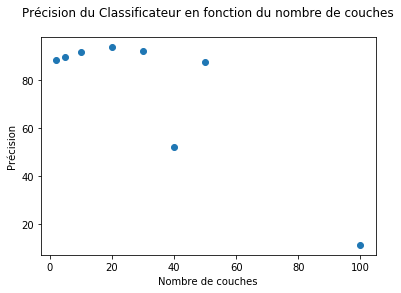

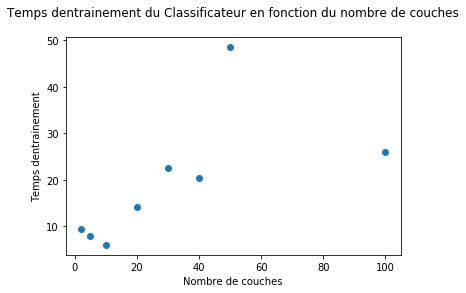

In [5]:
xcouches=[]
yprecision=[]
ytime=[]

#2 Layers
layers2=[]
for i in range(2):
    layers2.append(50)

model2 = MLPClassifier(hidden_layer_sizes=tuple(layers2))
start2=time.time()
model2.fit(xtrain, ytrain)
delay2=time.time()-start2
precision_score2 = model2.score(xtest,ytest)*100
#print("precision score for 2 layers = "+str(precision_score2))
xcouches.append(2)
yprecision.append(precision_score2)
ytime.append(delay2)

#5 Layers
layers5=[]
for i in range(5):
    layers5.append(50)

model5 = MLPClassifier(hidden_layer_sizes=tuple(layers5))
start5=time.time()
model5.fit(xtrain, ytrain)
delay5=time.time()-start5
precision_score5 = model5.score(xtest,ytest)*100
#print("precision score for 5 layers = "+str(precision_score5))
xcouches.append(5)
yprecision.append(precision_score5)
ytime.append(delay5)

#10 to 50 Layers
for j in range(10,60,10):
    layers10=[]
    for i in range(j):
        layers10.append(50)

    model10 = MLPClassifier(hidden_layer_sizes=tuple(layers10))
    start10=time.time()
    model10.fit(xtrain, ytrain)
    delay10=time.time()-start10
    precision_score10 = model10.score(xtest,ytest)*100
    #print("precision score for 10 layers = "+str(precision_score10))
    xcouches.append(j)
    yprecision.append(precision_score10)
    ytime.append(delay10)

#100 Layers
layers100=[]
for i in range(100):
    layers100.append(50)

model100 = MLPClassifier(hidden_layer_sizes=tuple(layers100))
start100=time.time()
model100.fit(xtrain, ytrain)
delay100=time.time()-start100
precision_score100 = model100.score(xtest,ytest)*100
#print("precision score for 100 layers = "+str(precision_score100))
xcouches.append(100)
yprecision.append(precision_score100)
ytime.append(delay100)

#Plot Precision
plt.scatter(xcouches,yprecision)
plt.title('Précision du Classificateur en fonction du nombre de couches\n')
plt.xlabel('Nombre de couches')
plt.ylabel('Précision')
#plt.savefig('ScatterPlot_01.png')
plt.show()

#Plot Time
plt.scatter(xcouches,ytime)
plt.title('Temps dentrainement du Classificateur en fonction du nombre de couches\n')
plt.xlabel('Nombre de couches')
plt.ylabel('Temps dentrainement')
#plt.savefig('ScatterPlot_01.png')
plt.show()



#### Construire 2 modèles de classification des données mnist, avec des réseaux qui ont respectivement :
- Modèle1: 50 couches cachées, et des tailles de couches de manière regressives de 60 à 11 par pas de -1 
- Modèle2: 20 couches cachées, et des tailles de couches de manière regressives de 60 à 33 par pas de -3, puis -2  

Quelles sont les performances en taux de bonne classification et en temps d’apprentissage obtenus pour chaque modèle ? Utilisez la fonction time() du package time pour mesurer le temps d’apprentissage d’un modèle.   

In [6]:
#Model1 : 50 Couches, 60 à 11 neuronnes par pas de -1
layersRegressif50 = []
for i in range(60,10,-1) :
    layersRegressif50.append(i)
modelRegressif50 = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif50))
start1 = time.time()
modelRegressif50.fit(xtrain, ytrain)
delay1 = time.time() - start1
precision_scoreRegressif50 = modelRegressif50.score(xtest,ytest)*100

print(" - Modèle 1 : ")
print("Score = "+str(precision_scoreRegressif50))
print("Temps d'entrainement = "+str(delay1)+"\n")

#Model2 : 20 Couches, 60 à 11 neuronnes par pas de -3 jusqu'à 33, puis pas de -2
layersRegressif20 = []
for i in range(60,32,-3) :
    layersRegressif20.append(i)

for i in range(31,10,-2) :
    layersRegressif20.append(i)

modelRegressif20 = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20))
start2 = time.time()
modelRegressif20.fit(xtrain, ytrain)
delay2 = time.time() - start2
precision_scoreRegressif20 = modelRegressif20.score(xtest,ytest)*100

print(" - Modèle 2 : ")
print("Score = "+str(precision_scoreRegressif20))
print("Temps d'entrainement = "+str(delay2))



 - Modèle 1 : 
Score = 11.333333333333332
Temps d'entrainement = 13.117745876312256

 - Modèle 2 : 
Score = 92.61904761904762
Temps d'entrainement = 20.750596523284912


#### Etudier la convergence des algorithmes d’optimisation disponibles : L-BFGS, SGD et Adam


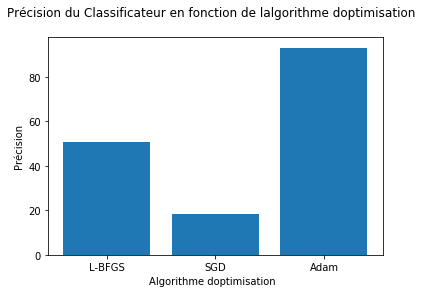

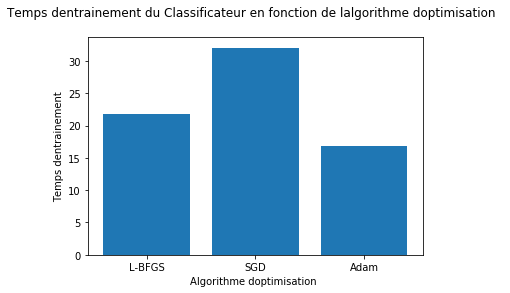

In [7]:
#On garde le 2e type de Modèle régressif avec 20 couches car il est plus efficace
xcouches2=[]
yprecision2=[]
ytime2=[]

#L-BFGS
model20_lbfgs = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), solver='lbfgs')
start_lbfgs=time.time()
model20_lbfgs.fit(xtrain, ytrain)
delay_lbfgs=time.time()-start_lbfgs
prec_model20_lbfgs = model20_lbfgs.score(xtest,ytest)*100
#print("precision score for 20 layers régressifs, L-BFGS = "+str(prec_model20_lbfgs))
xcouches2.append("L-BFGS")
yprecision2.append(prec_model20_lbfgs)
ytime2.append(delay_lbfgs)

#SGD
model20_sgd = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), solver='sgd')
start_sgd=time.time()
model20_sgd.fit(xtrain, ytrain)
delay_sgd=time.time()-start_sgd
prec_model20_sgd = model20_sgd.score(xtest,ytest)*100
#print("Precision score for 20 layers régressifs, SGD = "+str(prec_model20_sgd))
xcouches2.append("SGD")
yprecision2.append(prec_model20_sgd)
ytime2.append(delay_sgd)

#Adam
model20_adam = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), solver='adam')
start_adam=time.time()
model20_adam.fit(xtrain, ytrain)
delay_adam=time.time()-start_adam
prec_model20_adam = model20_adam.score(xtest,ytest)*100
xcouches2.append("Adam")
yprecision2.append(prec_model20_adam)
ytime2.append(delay_adam)

#Plot Precision
plt.bar(xcouches2,yprecision2)
plt.title('Précision du Classificateur en fonction de lalgorithme doptimisation  \n')
plt.xlabel('Algorithme doptimisation  ')
plt.ylabel('Précision')
plt.show()

#Plot Time
plt.bar(xcouches2,ytime2)
plt.title('Temps dentrainement du Classificateur en fonction de lalgorithme doptimisation  \n')
plt.xlabel('Algorithme doptimisation ')
plt.ylabel('Temps dentrainement')
plt.show()



#### Varier les fonctions d’activation {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

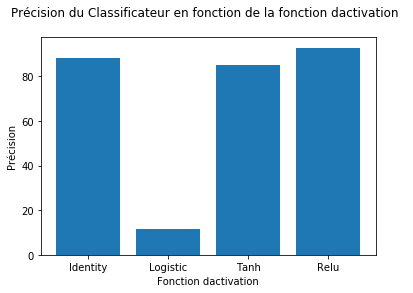

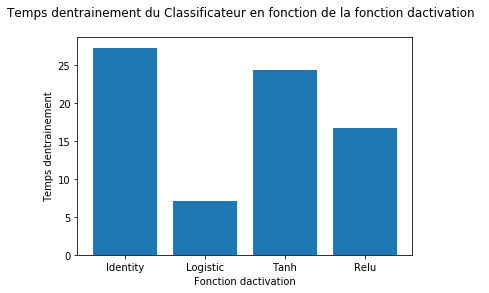

In [8]:
#On garde le 2e type de Modèle régressif avec 20 couches car il est plus efficace
xcouches3=[]
yprecision3=[]
ytime3=[]

#Identity
model20_id = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), activation='identity')
start_id=time.time()
model20_id.fit(xtrain, ytrain)
delay_id=time.time()-start_id
prec_model20_id = model20_id.score(xtest,ytest)*100
#print("Precision score for 20 layers régressifs (fonction activation: Identity) = "+str(prec_model20_id))
xcouches3.append("Identity")
yprecision3.append(prec_model20_id)
ytime3.append(delay_id)

#Logistic
model20_log = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), activation='logistic')
start_log=time.time()
model20_log.fit(xtrain, ytrain)
delay_log=time.time()-start_log
prec_model20_log = model20_log.score(xtest,ytest)*100
#print("Precision score for 20 layers régressifs (fonction activation: Logistic) = "+str(prec_model20_log))
xcouches3.append("Logistic")
yprecision3.append(prec_model20_log)
ytime3.append(delay_log)

#Tanh
model20_tanh = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), activation='tanh')
start_tanh=time.time()
model20_tanh.fit(xtrain, ytrain)
delay_tanh=time.time()-start_tanh
prec_model20_tanh = model20_tanh.score(xtest,ytest)*100
#print("Precision score for 20 layers régressifs (fonction activation: Tanh) = "+str(prec_model20_tanh))
xcouches3.append("Tanh")
yprecision3.append(prec_model20_tanh)
ytime3.append(delay_tanh)

#Relu
model20_relu = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), activation='relu')
start_relu=time.time()
model20_relu.fit(xtrain, ytrain)
delay_relu=time.time()-start_relu
prec_model20_relu = model20_relu.score(xtest,ytest)*100
#print("Precision score for 20 layers régressifs (fonction activation: Relu) = "+str(prec_model20_relu))
xcouches3.append("Relu")
yprecision3.append(prec_model20_relu)
ytime3.append(delay_relu)

#Plot Precision
plt.bar(xcouches3,yprecision3)
plt.title('Précision du Classificateur en fonction de la fonction dactivation  \n')
plt.xlabel('Fonction dactivation')
plt.ylabel('Précision')
plt.show()

#Plot Time
plt.bar(xcouches3,ytime3)
plt.title('Temps dentrainement du Classificateur en fonction de la fonction dactivation  \n')
plt.xlabel('Fonction dactivation')
plt.ylabel('Temps dentrainement')
plt.show()


#### Changer la valeur de la régularisation L2 (paramètre α)

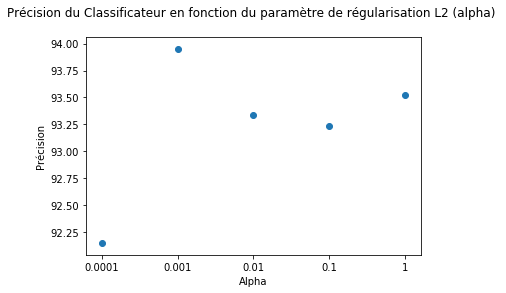

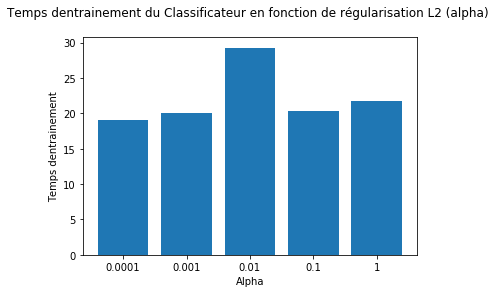

In [10]:
#alpha : float, optional, default 0.0001
xcouches4=[]
yprecision4=[]
ytime4=[]

#alpha=1e-4 (0.0001)
model20_4 = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), alpha=1e-4)
start_4=time.time()
model20_4.fit(xtrain, ytrain)
delay_4=time.time()-start_4
prec_model20_4 = model20_4.score(xtest,ytest)*100
#print("Precision score for 20 layers régressifs (fonction activation: Identity) = "+str(prec_model20_id))
xcouches4.append("0.0001")
yprecision4.append(prec_model20_4)
ytime4.append(delay_4)

#alpha=1e-3 (0.001)
model20_3 = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), alpha=1e-3)
start_3=time.time()
model20_3.fit(xtrain, ytrain)
delay_3=time.time()-start_3
prec_model20_3 = model20_3.score(xtest,ytest)*100
#print("Precision score for 20 layers régressifs (fonction activation: Identity) = "+str(prec_model20_id))
xcouches4.append("0.001")
yprecision4.append(prec_model20_3)
ytime4.append(delay_3)

#alpha=1e-2 (0.01)
model20_2 = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), alpha=1e-2)
start_2=time.time()
model20_2.fit(xtrain, ytrain)
delay_2=time.time()-start_2
prec_model20_2 = model20_2.score(xtest,ytest)*100
#print("Precision score for 20 layers régressifs (fonction activation: Identity) = "+str(prec_model20_id))
xcouches4.append("0.01")
yprecision4.append(prec_model20_2)
ytime4.append(delay_2)

#alpha=1e-1 (0.1)
model20_1 = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), alpha=1e-1)
start_1=time.time()
model20_1.fit(xtrain, ytrain)
delay_1=time.time()-start_1
prec_model20_1 = model20_1.score(xtest,ytest)*100
#print("Precision score for 20 layers régressifs (fonction activation: Identity) = "+str(prec_model20_id))
xcouches4.append("0.1")
yprecision4.append(prec_model20_1)
ytime4.append(delay_1)

#alpha=1e-0 (1)
model20_0 = MLPClassifier(hidden_layer_sizes=tuple(layersRegressif20), alpha=1e-0)
start_0=time.time()
model20_0.fit(xtrain, ytrain)
delay_0=time.time()-start_0
prec_model20_0 = model20_0.score(xtest,ytest)*100
#print("Precision score for 20 layers régressifs (fonction activation: Identity) = "+str(prec_model20_id))
xcouches4.append("1")
yprecision4.append(prec_model20_0)
ytime4.append(delay_0)

#Plot Precision
plt.scatter(xcouches4,yprecision4)
plt.title('Précision du Classificateur en fonction du paramètre de régularisation L2 (alpha) \n')
plt.xlabel('Alpha')
plt.ylabel('Précision')
plt.show()

#Plot Time
plt.bar(xcouches4,ytime4)
plt.title('Temps dentrainement du Classificateur en fonction de régularisation L2 (alpha) \n')
plt.xlabel('Alpha')
plt.ylabel('Temps dentrainement')
plt.show()


#### Choisissez le modèle qui propose de meilleurs résultats

Au vu de toutes les expérimentations vues jusqu'à présent, le modèle qui propose de meilleurs résultats est un modèle ayant comme paramètres:
- Un nombre de couches compris aux alentours de 20 (entre 15 et 25 environ, selon le 1er graphique), en méthode régréssive avec un nombre de neuronnes compris entre 60 et 10 meme avec un pas d'environ -2 ou -3
- Adam, comme comme algo d'optimisation
- Relu, comme fonction d'activation. Les autres sont assez proches en terme de résultat, à l'expection de 'logistic' qui n'est pas précise
- Un paramètre de regulation le plus petit possible (environ 0.0001 ou moins)

#### A votre avis, quels sont les avantages et les inconvénients des A-nn : optimalité ? temps de calcul ? passage à l'échelle ? 

#### Avantages: 
    - Tolérance aux fautes: Meme si un ou plusieurs neuronnes sont corrumpus, cela n'empeche pas la génération de sortie(s)
    - Capacité à faire du calcul en parallèle
    - Capacité à générer des estimations pertinentes à partir de peu d'exemples 
    
#### Inconvénients: 
    - Architecture: Il n'existe pas vraiment de moyens permettant de définir l'architecture optimale du réseau de neurones. En effet, le réseau qui apparaît optimal d'une façon globale ne délivre pas toujours les résultats les plus pertinents. Il est donc souvent difficile de déterminer le nombre de couches cachées du réseau ainsi que le nombre de neurones sur chacune d'entre elles
    - Décisions prises qui sont difficiles à analyser ou expliquer
    - Difficultés à estimer les temps de calcul du A-nn